In [2]:
import numpy as np
import  pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [4]:
train.head(10)
test.head(10)

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
5,70133,2021-01-01,Belgium,KaggleRama,Kaggle Getting Started
6,70134,2021-01-01,Belgium,KaggleRama,Kaggle Recipe Book
7,70135,2021-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose
8,70136,2021-01-01,France,KaggleMart,Kaggle Advanced Techniques
9,70137,2021-01-01,France,KaggleMart,Kaggle Getting Started


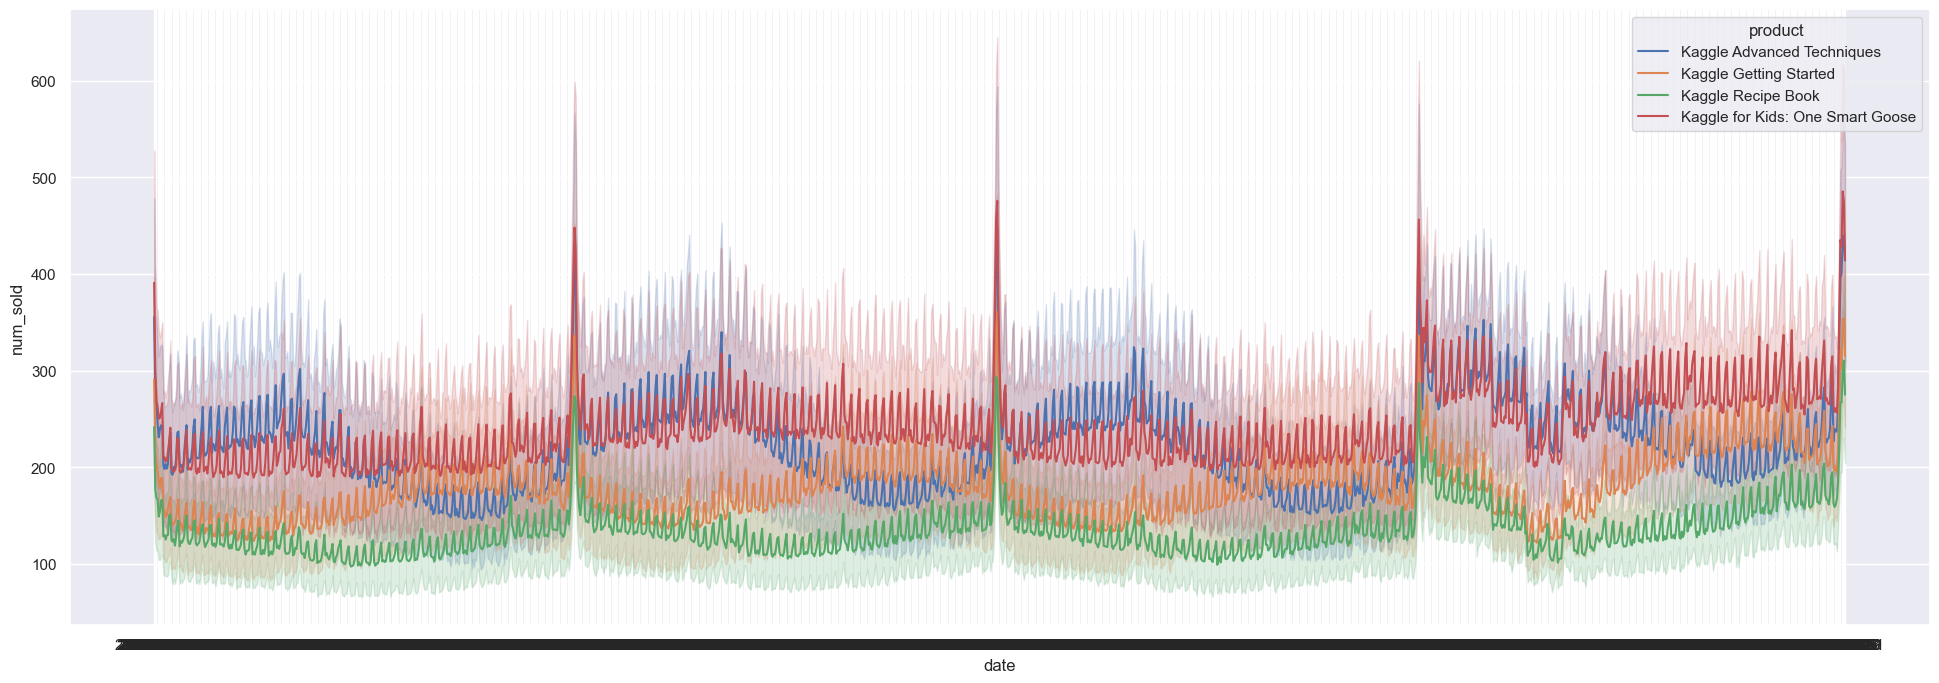

In [5]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=train,x='date',y='num_sold',hue='product')


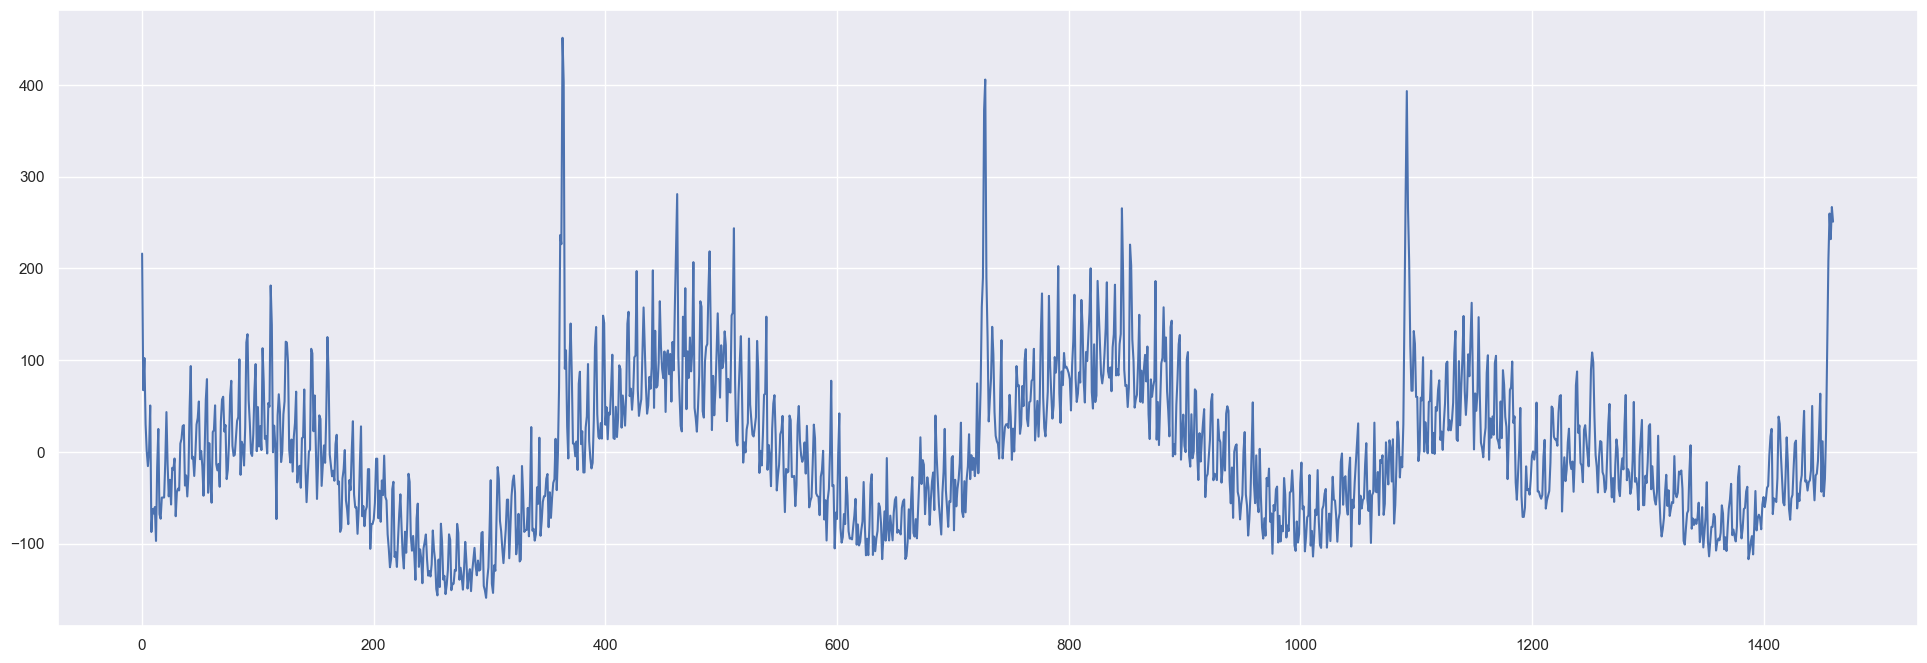

In [7]:
from scipy import signal
df=train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
detrended=signal.detrend(df.num_sold.values)
plt.plot(detrended)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 70080
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    1461 non-null   int64 
 1   date      1461 non-null   object
 2   country   1461 non-null   object
 3   store     1461 non-null   object
 4   product   1461 non-null   object
 5   num_sold  1461 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 79.9+ KB


[]

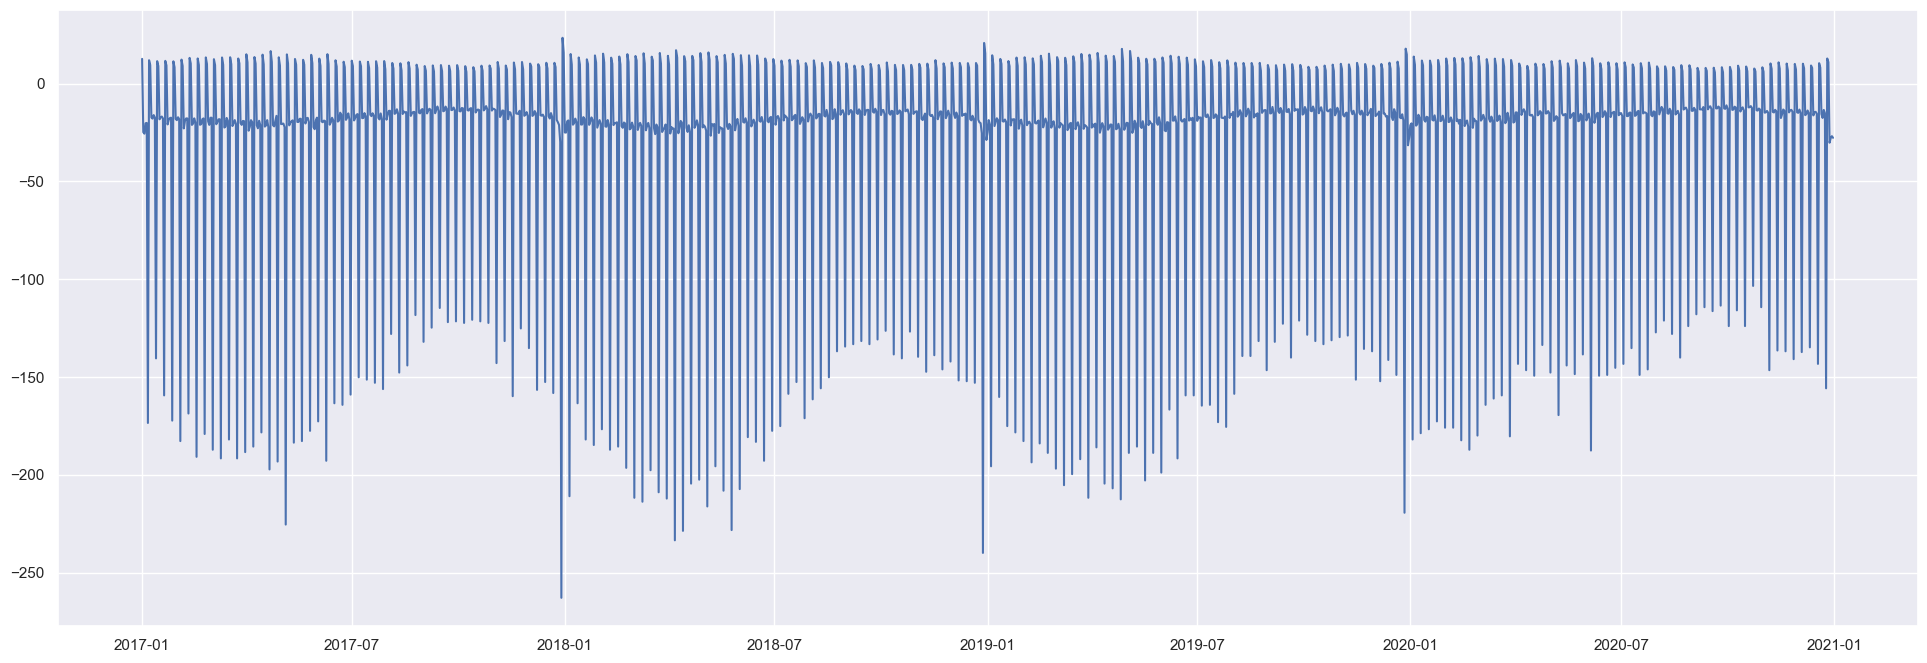

In [10]:
df=train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
df=df.set_index('date')
df.index=pd.to_datetime(df.index)
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul =seasonal_decompose(df['num_sold'],model='additive',extrapolate_trend='freq')
deseasonalized=df.num_sold.values/result_mul.seasonal
plt.plot(deseasonalized)
plt.plot()

[]

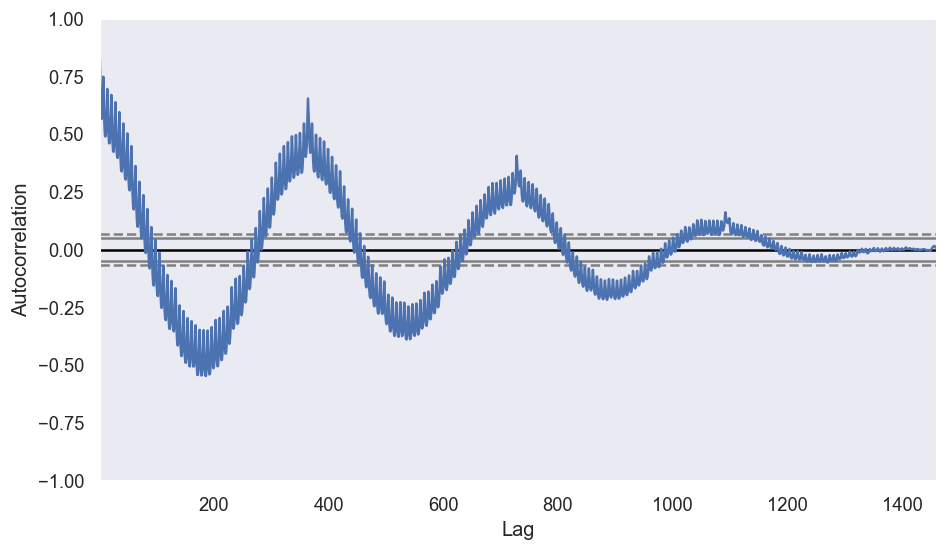

In [11]:
from pandas.plotting import  autocorrelation_plot
df=train[(train['country']=='France')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
plt.rcParams.update({'figure.figsize':(9,5),'figure.dpi':120})
autocorrelation_plot(df.num_sold.tolist())
plt.plot()

In [12]:
df=train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
series=pd.DataFrame()
series['value']=df['num_sold']
series=series.set_index(df['date'])
series.index=pd.to_datetime(series.index)

c:\Users\sawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 1461
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7515.898
Date:                Thu, 25 Apr 2024   AIC                          15043.797
Time:                        14:27:08   BIC                          15075.514
Sample:                    01-01-2017   HQIC                         15055.628
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.020    -16.123      0.000      -0.358      -0.280
ar.L2         -0.3069      0.016    -18.621      0.000      -0.339      -0.275
ar.L3         -0.2861      0.023    -12.613      0.0

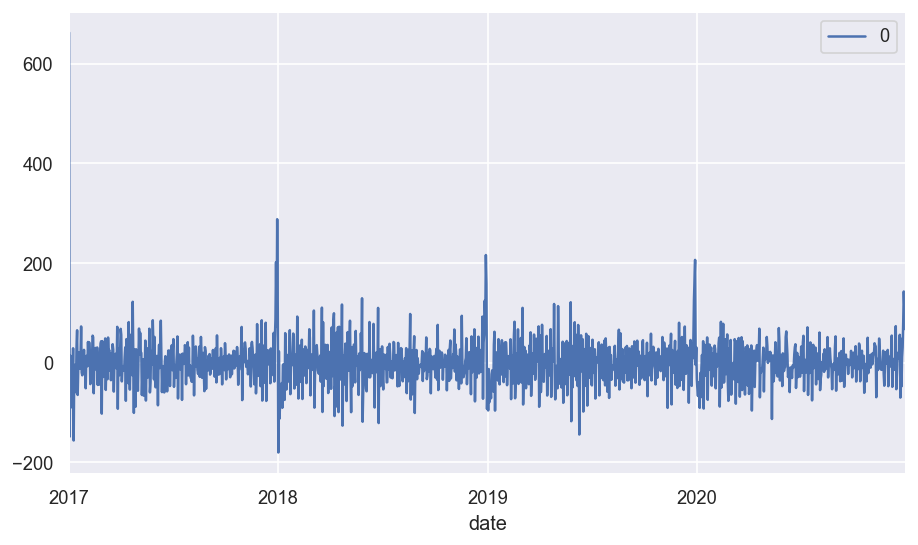

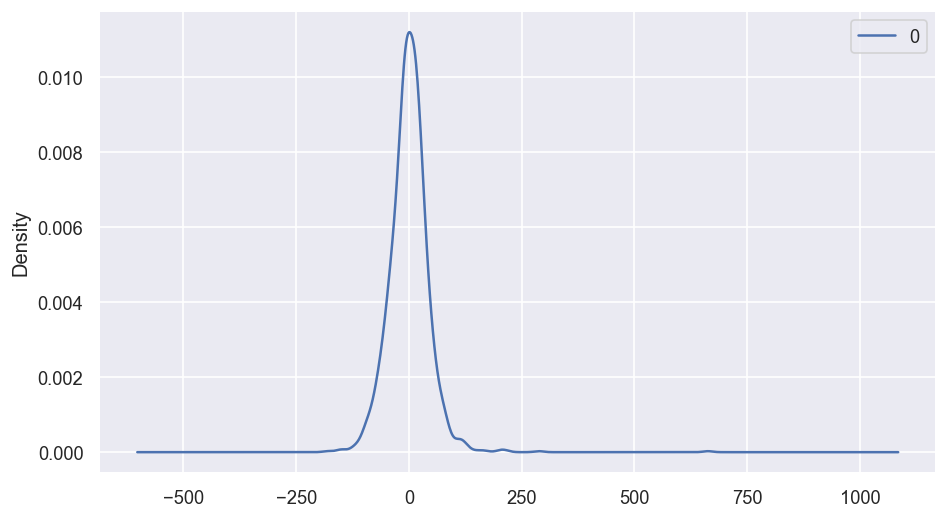

                 0
count  1461.000000
mean      0.388641
std      45.151376
min    -180.506780
25%     -23.286515
50%       0.017558
75%      23.277978
max     663.000000


In [15]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(series,order=(5,1,0))
model_fit=model.fit()
print(model_fit.summary())
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

ARIMA (Autoregressive Integrated Moving Average) is a statistical model used to analyze and forecast time series data. It's a powerful tool for understanding patterns and trends in data that's collected over regular intervals, such as daily, weekly, or monthly.

The ARIMA model is composed of three key components:

Autoregressive (AR): This component uses past values of the time series to forecast future values. It's based on the idea that past patterns can be used to predict future behavior.
Integrated (I): This component accounts for the presence of non-stationarity in the time series data. Non-stationarity means that the data has a trend or seasonality that needs to be removed to make the data stationary. The integrated component uses differencing to make the data stationary.
Moving Average (MA): This component uses the errors (residuals) from the AR component as predictors. It's based on the idea that the errors are correlated and can be used to improve the forecast.
The ARIMA model is often denoted as ARIMA(p, d, q), where:

p is the number of autoregressive terms
d is the degree of differencing (i.e., the number of times the data needs to be differenced to make it stationary)
q is the number of moving average terms
The ARIMA model is widely used in various fields, including finance, economics, and environmental studies, to forecast future values of a time series. It's a popular tool for data scientists and analysts to make predictions and drive business decisions.



